In [3]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

## 1 Generating random numbers from a generic random distribution
_(25 Points)_ We learned how to produce pseudorandom numbers with uniform distributions in the range of $[0,1]$. In this problem we will visit a method discussed in the last lecture to derive a generic distribution starting from a uniform  distribution of random numbers.

Let us assume that we want pseudorandom numbers in the interval $[a, b]$ of the following (unnormalized) distribution

$$p (\theta) = e^{\cos\theta} - e^{\sin 2\theta}$$

_(1.1)_ whose image is defined in the rectangle $[0, c]$.

_(5 Points)_ Plot the function in that interval $[a, b]$ and find its maximum $c$. You need to choose your own $a \in [- 10, 0 )$ and $b \in ( 0, 10 ]$.

The maximum c=4.975205796166745


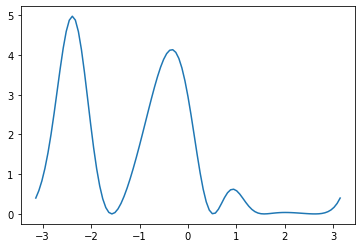

In [80]:
I = [-np.pi, np.pi]
theta =np.linspace(I[0], I[1], 101)

p_theta = lambda t: (np.exp(np.cos(t)) - np.exp(np.sin(2*t)))**2

ran = p_theta(theta)

plt.plot(theta, ran)
c = max(ran)
print("The maximum c={}".format(c))

_(5 Points)_ Using your own LCG, generate two uniform pseudorandom sequences of lengths N = 100000 between $[0, 1]: U_1$ and $U_2$.

In [81]:
def LCG_uniform(n,seed, a, c, m):
    numbers = [float(seed)/m]
    previous = seed
    for i in range(1,n):
        next_number = (previous*a + c) % m
        previous = next_number
        numbers.append(float(next_number) / m)
    return np.array(numbers)

In [82]:
N = 100000
s1 = LCG_uniform(N, 601, 2473, 6079, 7919)
s2 = LCG_uniform(N, 311, 1283, 2459, 7309)

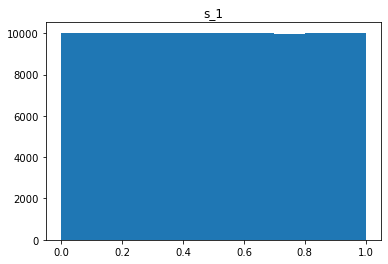

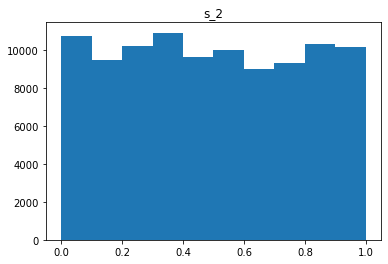

In [83]:
plt.hist(s1)
plt.title(r's_1')
plt.show()
plt.hist(s2)
plt.title(r's_2')
plt.show()

_(15 Points)_ Derive two other uniform numerical sequences according to the following rule:
$$
 X = a + ( b - a ) U_1,
$$
$$
Y = cU_2.
$$
Each pair of values $(U_1 , U_2)$ will correspond to a pair $(x, y)$ belonging to the rectangle, $[ a, b ] \times [ 0, c ]$. If the pair $(x, y)$ falls within the area of the function $p(\theta)$, it is accepted and will subsequently be used to create the desired pseudorandom sequence; otherwise, it will be discarded. In the latter case, the procedure is repeated
until a new pair located in the area of $p(\theta)$ is found. Following this procedure, are you generating random numbers that follow the distribution (1.1)? Why?

In [84]:
a = I[0]
b = I[1]
x = a + (b-a)*s1
y = c*s2

inside_bool = y <= p_theta(x)

x_in = x[inside_bool]
y_in = y[inside_bool]

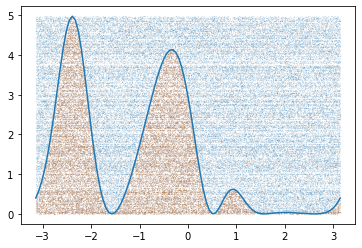

In [85]:
plt.plot(theta, ran)
plt.scatter(x,y, s=0.001)
plt.scatter(x_in,y_in, s=0.001)

Visually we can see that the criteria to choose the values for the secuence must be inside the area of the function, eventually if the number of points increases, and if we redefine the rectangle from which we are choosing the values, the values will ressemble the integral of our initial function, meaning these are following the initial distribution.

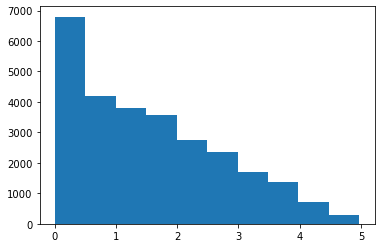

In [86]:
r = plt.hist(y_in)

# 2 Stability
_(25 Points)_

_(15 Points)_ Test the linear stability of the zero solution $x (t) \equiv 0, y (t) \equiv 0$, of the following system

$$x_0= - x + ae^y - 3 cos x$$
$$y_0 = 1 + 6y - e^y - sin x$$

using the linearization method, for $a$ chosen by you in the range $[ 1, 10 ]$.

I will choose $a=5$, therefore the new system is
$$x_0= - x + 5e^y - 3 cos x$$
$$y_0 = 1 + 6y - e^y - sin x$$
and by the linearization method we obtain:
$$
J = 
\begin{bmatrix}
    -1 + 3\sin(x) & -5ye^y\\
    -\cos(x) & 6-e^y
\end{bmatrix}_{x=y=0}
=
\begin{bmatrix}
    -1 & 0\\
    -1 & 5
\end{bmatrix}
$$
Then,
$$
\det(J - \lambda I) = 
\begin{vmatrix}
    -1 - \lambda& 0\\
    -1 & 5 - \lambda
\end{vmatrix}
 = (\lambda + 1) (\lambda - 5),
$$

Therefore $\lambda_1 = -1$ and $\lambda_2 = 5$, wich indicates that we have a saddle point.

_(10 Points)_ Numerically solve the system and visually check the result you found before, by following the linearization method.

I really don't remember how to solve numerically a system of ODE's 

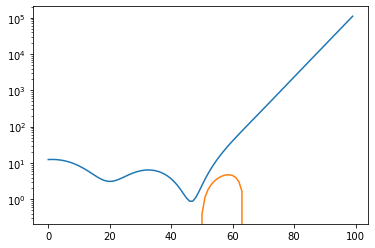

In [93]:
x = np.linspace(-10,10, 100)
y = np.linspace(-10, 10, 100)
y_1 = -x + 5* np.exp(y) - 3*np.cos(x)
y_2 = 1 + 6*y-np.exp(y)-np.sin(x)
plt.plot(y_1)
plt.plot(y_2)
plt.yscale('log')